In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_csv("/home/piyumal/PHD/phylogenetics/bootstrap_support/final_mpboot_train_v2_ufboot_20240409.csv")

In [3]:
data_df

,branchId,branch_length_ratio_split,mean_closeness_centrality_ratio,parsimony_support,min_pars_support_children_weighted,max_pars_support_children_weighted,mean_pars_support_parents_weighted,branch_length,norm_branch_length,min_pars_support_children,...,std_pars_bootstrap_support_children,mean_norm_rf_distance,max_substitution_frequency,mean_substitution_frequency,cv_substitution_frequency,skw_substitution_frequency,dataset,support,mpboot_value,ufboot_value
0,1,1.000000,1.000000,0.01,0.000000,3.356000,-1.000000,0.000000,0.000000,0.0,...,34.767881,0.524040,0.375000,0.013423,4.070892,4.439707,12145_0,0.01,0.01,0.01
1,2,0.442778,0.169876,0.00,0.000000,0.763500,0.000000,0.016431,0.338672,0.0,...,31.736217,0.524040,0.375000,0.013423,4.070892,4.439707,12145_0,0.68,0.04,0.28
2,3,0.000022,0.016541,1.00,3.356000,3.356000,0.000000,0.033560,0.691731,100.0,...,-1.000000,0.524040,0.375000,0.013423,4.070892,4.439707,12145_0,0.87,0.89,0.86
3,5,0.085154,0.230757,0.43,0.000043,0.763500,0.000000,0.000001,0.000021,43.0,...,26.318561,0.524040,0.375000,0.013423,4.070892,4.439707,12145_0,0.75,0.30,0.44
4,9,0.000045,0.023630,1.00,0.000100,0.763500,0.000014,0.007635,0.157371,100.0,...,3.500000,0.524040,0.375000,0.013423,4.070892,4.439707,12145_0,0.73,0.82,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68588,23,0.148782,0.106783,0.02,0.000002,0.151000,0.023666,0.000001,0.000050,2.0,...,23.068593,0.812321,0.105263,0.007428,2.617083,2.499561,14433_0,0.02,0.07,0.00
68589,28,0.148749,0.204262,0.05,0.000005,0.151000,0.020286,0.000001,0.000050,5.0,...,23.932196,0.812321,0.105263,0.007428,2.617083,2.499561,14433_0,0.11,0.11,0.02
68590,30,0.049436,0.015988,1.00,0.000017,0.151000,0.017750,0.001510,0.075248,17.0,...,26.549744,0.812321,0.105263,0.007428,2.617083,2.499561,14433_0,0.75,0.84,0.80
68591,32,0.024767,0.011802,0.25,0.000017,0.000025,0.032556,0.000001,0.000050,17.0,...,7.000000,0.812321,0.105263,0.007428,2.617083,2.499561,14433_0,0.31,0.31,0.45


In [4]:
df = data_df.copy()

df.fillna(-1, inplace=True)
df.replace([np.inf, -np.inf], -1, inplace=True)

print("Median UFBOOT Support: ")
print(df["ufboot_value"].median())
df.columns = df.columns.str.replace(':', '_')


target = "ufboot_value"

X_train = df.drop(axis=1, columns=target)
y_train = df[target]

Median UFBOOT Support: 
0.9


In [5]:
X_train

,branchId,branch_length_ratio_split,mean_closeness_centrality_ratio,parsimony_support,min_pars_support_children_weighted,max_pars_support_children_weighted,mean_pars_support_parents_weighted,branch_length,norm_branch_length,min_pars_support_children,...,max_pars_bootstrap_support_children_w,std_pars_bootstrap_support_children,mean_norm_rf_distance,max_substitution_frequency,mean_substitution_frequency,cv_substitution_frequency,skw_substitution_frequency,dataset,support,mpboot_value
0,1,1.000000,1.000000,0.01,0.000000,3.356000,-1.000000,0.000000,0.000000,0.0,...,2.718360,34.767881,0.524040,0.375000,0.013423,4.070892,4.439707,12145_0,0.01,0.01
1,2,0.442778,0.169876,0.00,0.000000,0.763500,0.000000,0.016431,0.338672,0.0,...,0.557355,31.736217,0.524040,0.375000,0.013423,4.070892,4.439707,12145_0,0.68,0.04
2,3,0.000022,0.016541,1.00,3.356000,3.356000,0.000000,0.033560,0.691731,100.0,...,2.718360,-1.000000,0.524040,0.375000,0.013423,4.070892,4.439707,12145_0,0.87,0.89
3,5,0.085154,0.230757,0.43,0.000043,0.763500,0.000000,0.000001,0.000021,43.0,...,0.557355,26.318561,0.524040,0.375000,0.013423,4.070892,4.439707,12145_0,0.75,0.30
4,9,0.000045,0.023630,1.00,0.000100,0.763500,0.000014,0.007635,0.157371,100.0,...,0.557355,3.500000,0.524040,0.375000,0.013423,4.070892,4.439707,12145_0,0.73,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68588,23,0.148782,0.106783,0.02,0.000002,0.151000,0.023666,0.000001,0.000050,2.0,...,0.093620,23.068593,0.812321,0.105263,0.007428,2.617083,2.499561,14433_0,0.02,0.07
68589,28,0.148749,0.204262,0.05,0.000005,0.151000,0.020286,0.000001,0.000050,5.0,...,0.093620,23.932196,0.812321,0.105263,0.007428,2.617083,2.499561,14433_0,0.11,0.11
68590,30,0.049436,0.015988,1.00,0.000017,0.151000,0.017750,0.001510,0.075248,17.0,...,0.093620,26.549744,0.812321,0.105263,0.007428,2.617083,2.499561,14433_0,0.75,0.84
68591,32,0.024767,0.011802,0.25,0.000017,0.000025,0.032556,0.000001,0.000050,17.0,...,0.000014,7.000000,0.812321,0.105263,0.007428,2.617083,2.499561,14433_0,0.31,0.31


In [6]:
y_train

0        0.01
1        0.28
2        0.86
3        0.44
4        0.70
         ... 
68588    0.00
68589    0.02
68590    0.80
68591    0.45
68592    0.44
Name: ufboot_value, Length: 68593, dtype: float64

In [7]:
X_train.drop(axis=1, columns=['dataset', 'branchId', 'support'], inplace=True)

In [8]:
X_train

,branch_length_ratio_split,mean_closeness_centrality_ratio,parsimony_support,min_pars_support_children_weighted,max_pars_support_children_weighted,mean_pars_support_parents_weighted,branch_length,norm_branch_length,min_pars_support_children,std_pars_support_children,...,skewness_bootstrap_pars_support_tree,min_pars_bootstrap_support_children_w,max_pars_bootstrap_support_children_w,std_pars_bootstrap_support_children,mean_norm_rf_distance,max_substitution_frequency,mean_substitution_frequency,cv_substitution_frequency,skw_substitution_frequency,mpboot_value
0,1.000000,1.000000,0.01,0.000000,3.356000,-1.000000,0.000000,0.000000,0.0,44.958005,...,-0.067426,0.000000,2.718360,34.767881,0.524040,0.375000,0.013423,4.070892,4.439707,0.01
1,0.442778,0.169876,0.00,0.000000,0.763500,0.000000,0.016431,0.338672,0.0,42.091418,...,-0.067426,0.000021,0.557355,31.736217,0.524040,0.375000,0.013423,4.070892,4.439707,0.04
2,0.000022,0.016541,1.00,3.356000,3.356000,0.000000,0.033560,0.691731,100.0,-1.000000,...,-0.067426,2.718360,2.718360,-1.000000,0.524040,0.375000,0.013423,4.070892,4.439707,0.89
3,0.085154,0.230757,0.43,0.000043,0.763500,0.000000,0.000001,0.000021,43.0,26.870058,...,-0.067426,0.000021,0.557355,26.318561,0.524040,0.375000,0.013423,4.070892,4.439707,0.30
4,0.000045,0.023630,1.00,0.000100,0.763500,0.000014,0.007635,0.157371,100.0,0.000000,...,-0.067426,0.000080,0.557355,3.500000,0.524040,0.375000,0.013423,4.070892,4.439707,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68588,0.148782,0.106783,0.02,0.000002,0.151000,0.023666,0.000001,0.000050,2.0,36.063278,...,0.481723,0.000000,0.093620,23.068593,0.812321,0.105263,0.007428,2.617083,2.499561,0.07
68589,0.148749,0.204262,0.05,0.000005,0.151000,0.020286,0.000001,0.000050,5.0,37.204670,...,0.481723,0.000000,0.093620,23.932196,0.812321,0.105263,0.007428,2.617083,2.499561,0.11
68590,0.049436,0.015988,1.00,0.000017,0.151000,0.017750,0.001510,0.075248,17.0,37.383894,...,0.481723,0.000000,0.093620,26.549744,0.812321,0.105263,0.007428,2.617083,2.499561,0.84
68591,0.024767,0.011802,0.25,0.000017,0.000025,0.032556,0.000001,0.000050,17.0,4.000000,...,0.481723,0.000000,0.000014,7.000000,0.812321,0.105263,0.007428,2.617083,2.499561,0.31


In [35]:
rfe_feature_n=26
model = RandomForestRegressor(n_jobs=-1, n_estimators=1000, max_depth=10, min_samples_split=20,
                                      min_samples_leaf=10)
# rfe = RFE(estimator=model, n_features_to_select=rfe_feature_n)  # Adjust the number of features as needed
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=20,
                      n_estimators=1000, n_jobs=-1)

Text(0.5, 1.0, 'Feature Importance')

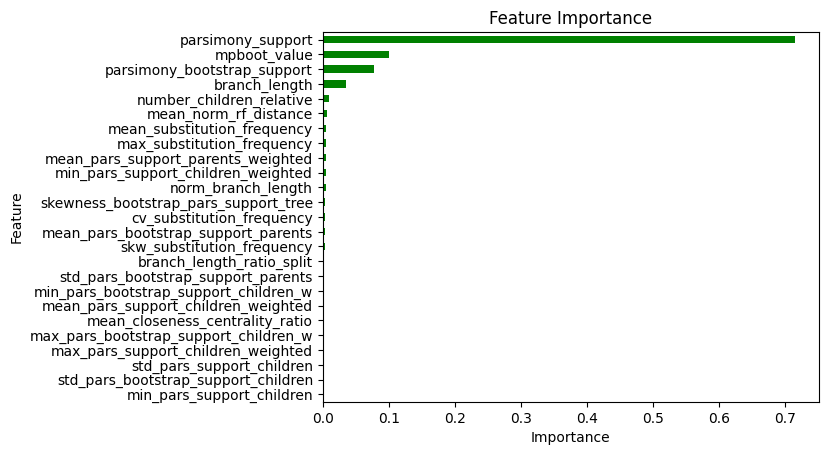

In [36]:
global_importances = pd.Series(model.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")

In [37]:
global_importances_2 = global_importances.copy()

In [38]:
important_features_dict = {}
for idx, val in enumerate(model.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print(f'5 most important features: {important_features_list}')

5 most important features: [2, 24, 12, 6, 10, 19, 21, 20, 5, 3, 7, 15, 22, 13, 23, 0, 14, 16, 11, 1, 17, 4, 9, 18, 8]


In [39]:
global_importances_2.sort_values(ascending=False, inplace=True)

In [40]:
global_importances_2_df = pd.DataFrame({'feature':global_importances_2.index, 'importance':global_importances_2.values})

In [41]:
global_importances_2_df

,feature,importance
0,parsimony_support,0.715108
1,mpboot_value,0.100988
2,parsimony_bootstrap_support,0.077157
3,branch_length,0.034719
4,number_children_relative,0.009161
5,mean_norm_rf_distance,0.006417
6,mean_substitution_frequency,0.005565
7,max_substitution_frequency,0.004982
8,mean_pars_support_parents_weighted,0.004716
9,min_pars_support_children_weighted,0.004616
